In [32]:
!pip install mlxtend

    100% |████████████████████████████████| 1.3MB 4.1MB/s ta 0:00:01
    100% |████████████████████████████████| 296kB 6.3MB/s ta 0:00:01


In [33]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_linear_regression

In [5]:
data = pd.read_csv('Data/ml.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207319 entries, 0 to 207318
Data columns (total 17 columns):
id_assessment                 207319 non-null int64
id_student                    207319 non-null int64
date_submitted                207319 non-null int64
is_banked                     207319 non-null int64
score                         207319 non-null float64
code_module                   207319 non-null object
code_presentation             207319 non-null object
gender                        207319 non-null object
region                        207319 non-null object
highest_education             207319 non-null object
imd_band                      207319 non-null object
age_band                      207319 non-null object
num_of_prev_attempts          207319 non-null int64
studied_credits               207319 non-null int64
disability                    207319 non-null object
final_result                  207319 non-null object
module_presentation_length    207319 non-null 

In [7]:
data['id_assessment'] = data['id_assessment'].apply(str)
data['id_student'] = data['id_student'].apply(str)
data['is_banked'] = data['is_banked'].apply(str)
data['code_module'] = data['code_module'].apply(str)
data['code_presentation'] = data['code_presentation'].apply(str)

Separate the target and the rest of the columns.

In [23]:
data_data = data[['date_submitted', 'num_of_prev_attempts', 'studied_credits', 'module_presentation_length']]
data_target = data["score"]

Initialize the model in the variable `data_model`

In [24]:
data_model = LinearRegression()

Fit the model and print the intercept and coefficients of the model. 

In [25]:
# Your code here:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(data_data, data_target, test_size=0.2)

In [26]:
data_model.fit(X_train, y_train)
print('Intercept: {}'.format(data_model.intercept_))
print ('')
print('Coef : {}'.format(data_model.coef_))

Intercept: 72.87521744426422

Coef : [-0.01193744 -3.06640285 -0.0211871   0.02338734]


In [27]:
from sklearn.metrics import r2_score

In [28]:
y_pred=data_model.predict(X_train)

r2_score(y_train, y_pred)

0.010074812443148562

In [29]:
y_test_pred=data_model.predict(X_test)

r2_score(y_test, y_test_pred)

0.009759794433369495

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

ValueError: Expected 2D array, got scalar array instead:
array=0.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

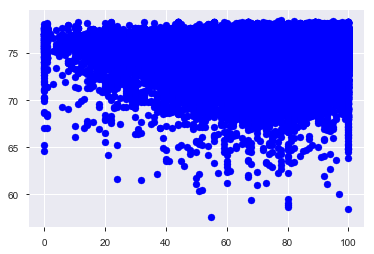

In [41]:
intercept, slope, corr_coeff = plot_linear_regression(y_test, y_test_pred)
plt.show()